In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

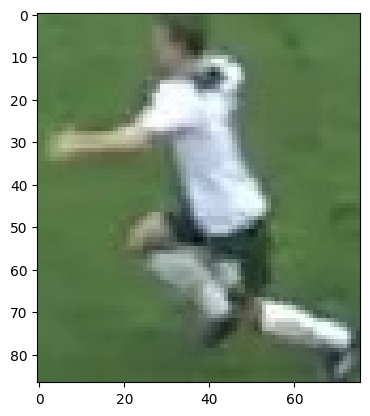

In [6]:
plt.imshow(image)
plt.show()


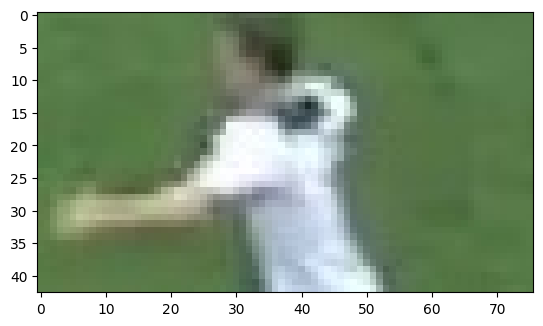

In [7]:
# take the top half of the image

top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

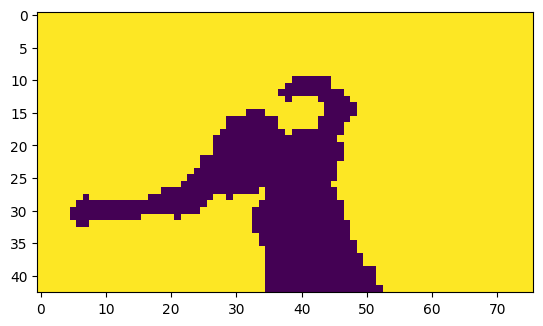

In [11]:
# cluster the image into 2d array

image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

#reshape the labels to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()



In [12]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [13]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [14]:
kmeans.cluster_centers_[player_cluster ]

array([198.7972028 , 209.71328671, 212.62412587])